In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer # for outlair removel
from scipy.stats import zscore # # for outlair removel
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings 
warnings.filterwarnings('ignore')

In [2]:
bank_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/bank_marketing.csv")

In [3]:
bank_data.shape

(11162, 17)

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Exploratory Data Analysis
1.Find Unwanted Columns

2.Find Missing Values

3.Find Features with one value

4.Explore the Categorical Features

5.Find Categorical Feature Distribution

6.Relationship between Categorical Features and Label

7.Explore the Numerical Features

8.Find Discrete Numerical Features

9.Relation between Discrete numerical Features and Labels

10.Find Continous Numerical Features

11.Distribution of Continous Numerical Features

12.Relation between Continous numerical Features and Labels

13.Find Outliers in numerical features

14.Explore the Correlation between numerical features

15.Find Pair Plot

16.Check the Data set is balanced or not based on target values in classification

In [8]:
bank_data.columns  # checking unwantede columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

All columns seems valid. there is no unwanted columns

In [9]:
#checking missing values 
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There is no null values in data set.

In [10]:
#chekcing if there is any value which is only one in quantity
for columns in bank_data.columns:
    print(columns,bank_data[columns].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


There is no one value in quantity. 

In [11]:
# checking the categorical features
categorical_features = [features for features in bank_data.columns if ((bank_data[features].dtypes=="O") & (features not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
# checking the categorical features count
for features in categorical_features:
    print('the feature is {} and number of categories are {}'.format(features,len(bank_data[features].unique())))

the feature is job and number of categories are 12
the feature is marital and number of categories are 3
the feature is education and number of categories are 4
the feature is default and number of categories are 2
the feature is housing and number of categories are 2
the feature is loan and number of categories are 2
the feature is contact and number of categories are 3
the feature is month and number of categories are 12
the feature is poutcome and number of categories are 4


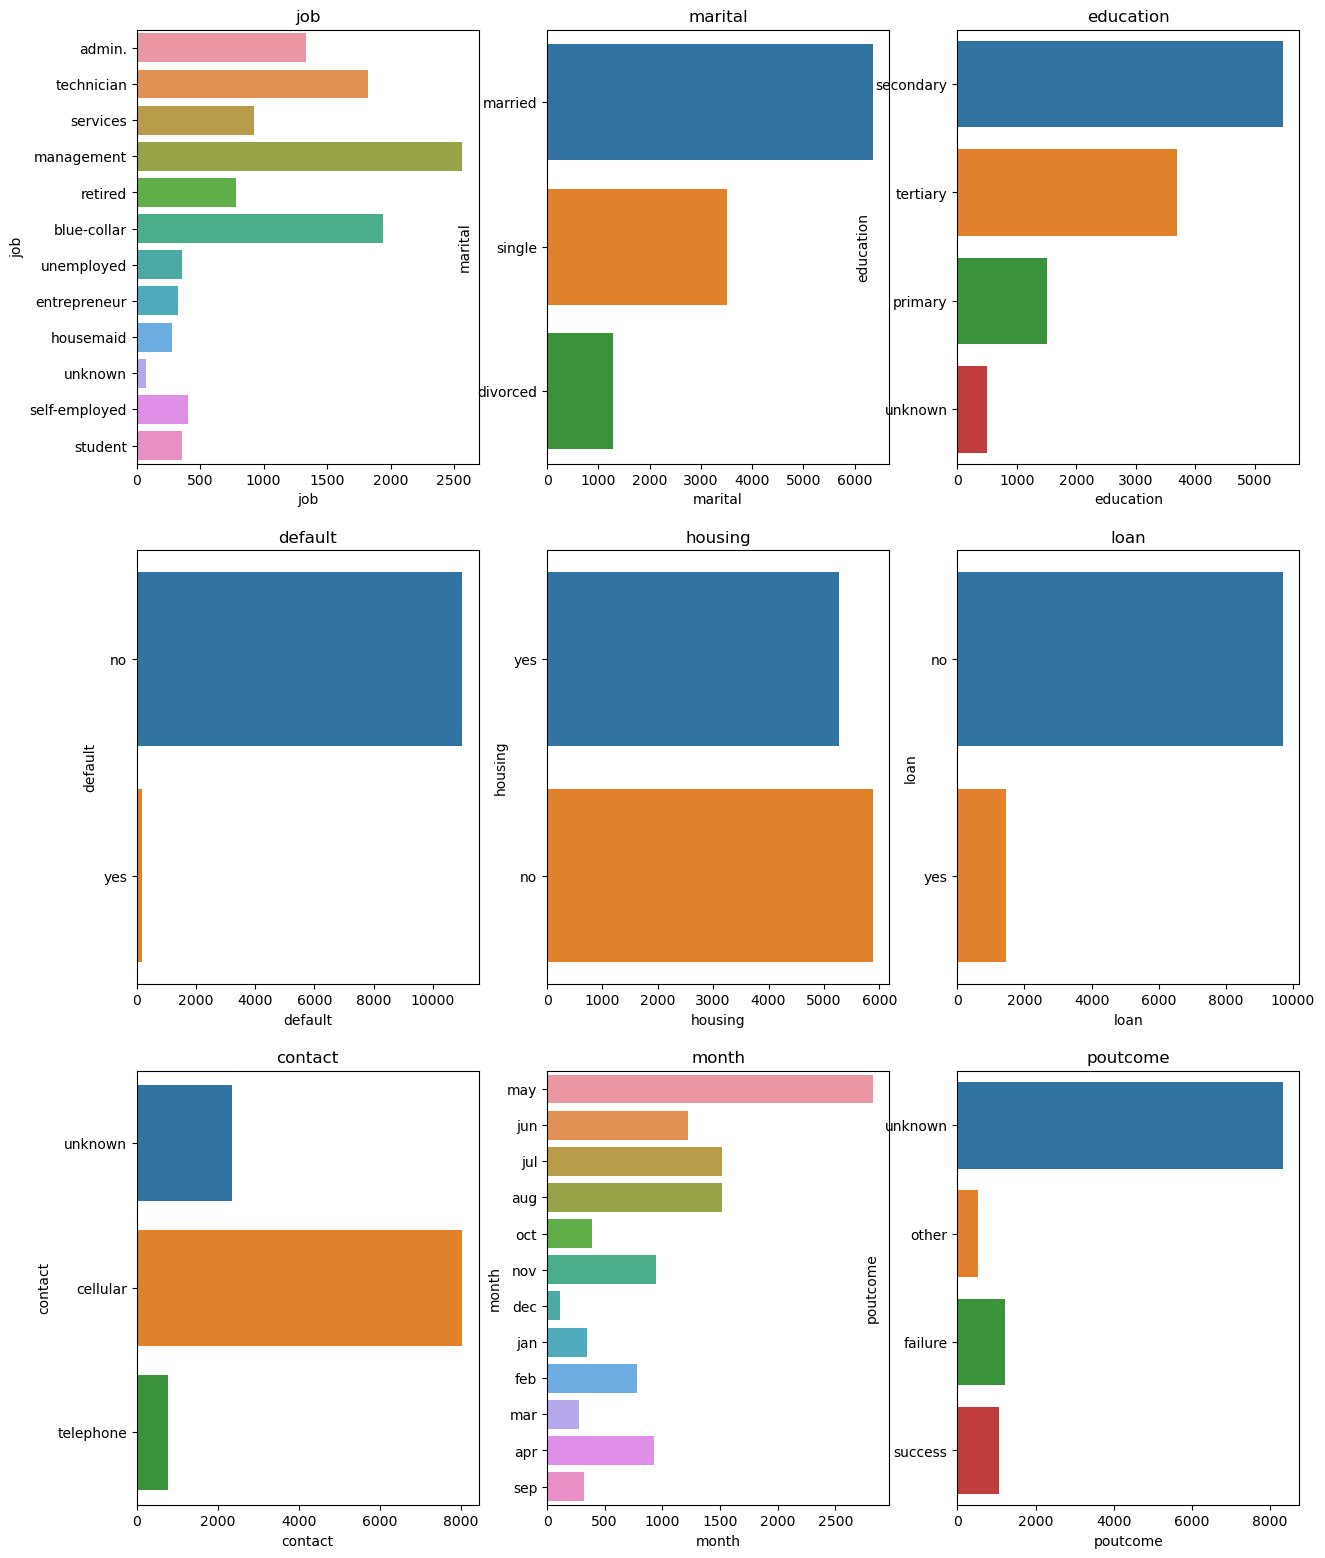

In [13]:
# ploting the categorical features distribustions
plt.figure(figsize=(15,80))
plt_num=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plt_num)
    sns.countplot(y=categorical_feature,data=bank_data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plt_num=plt_num+1
plt.show()

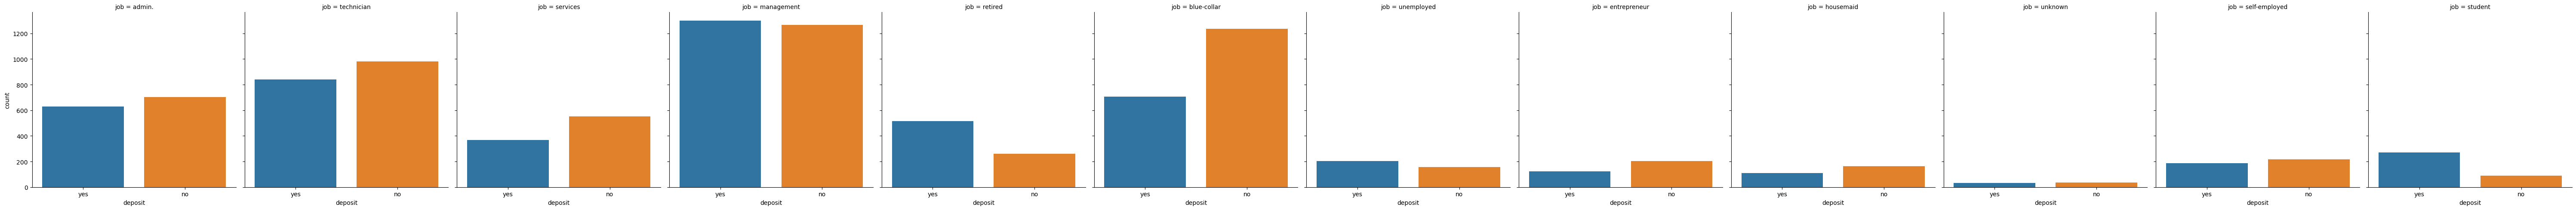

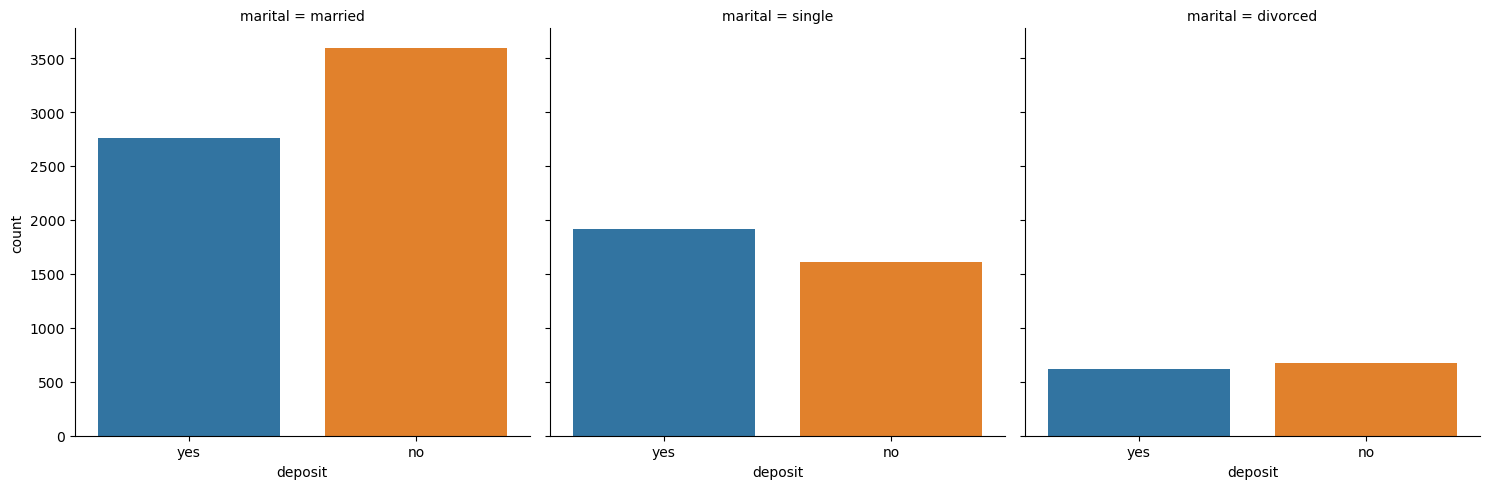

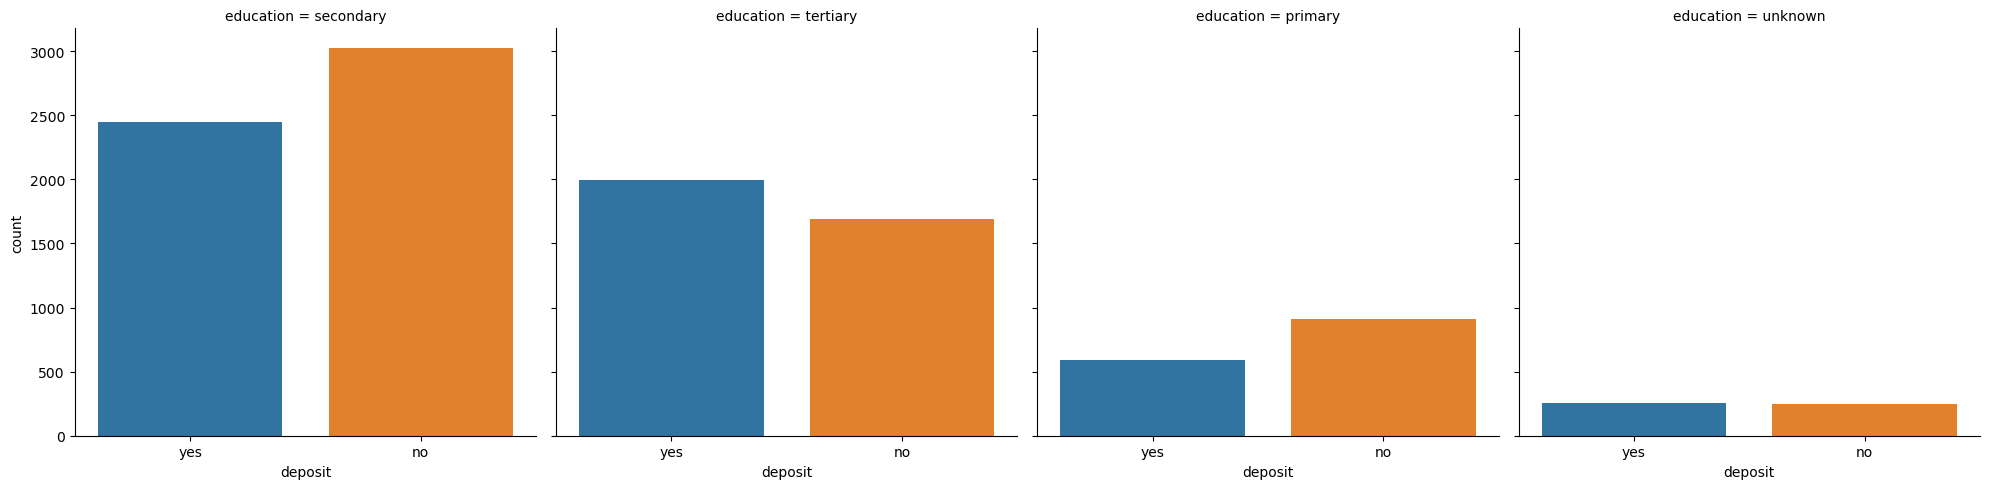

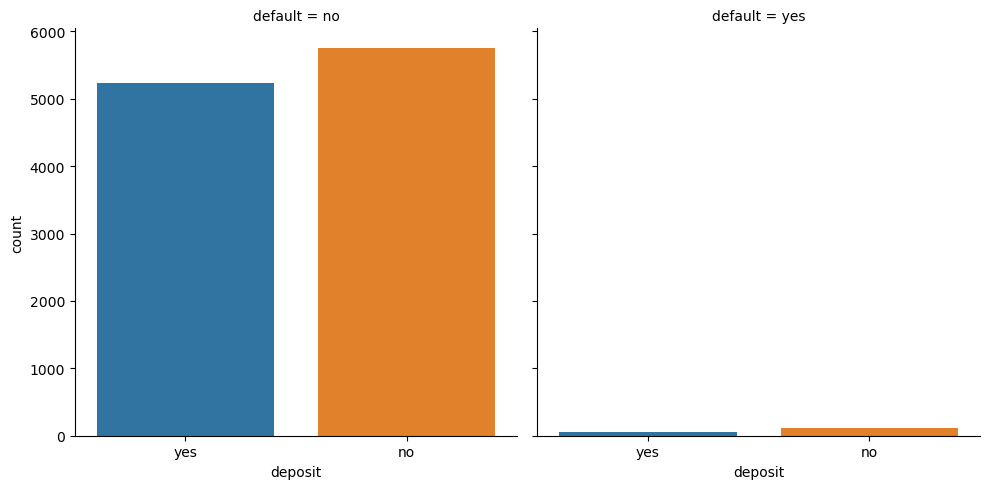

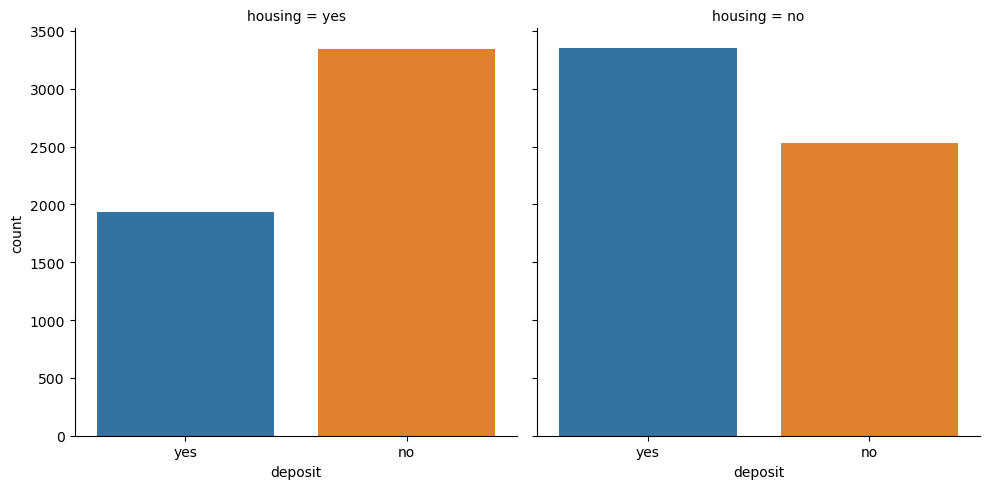

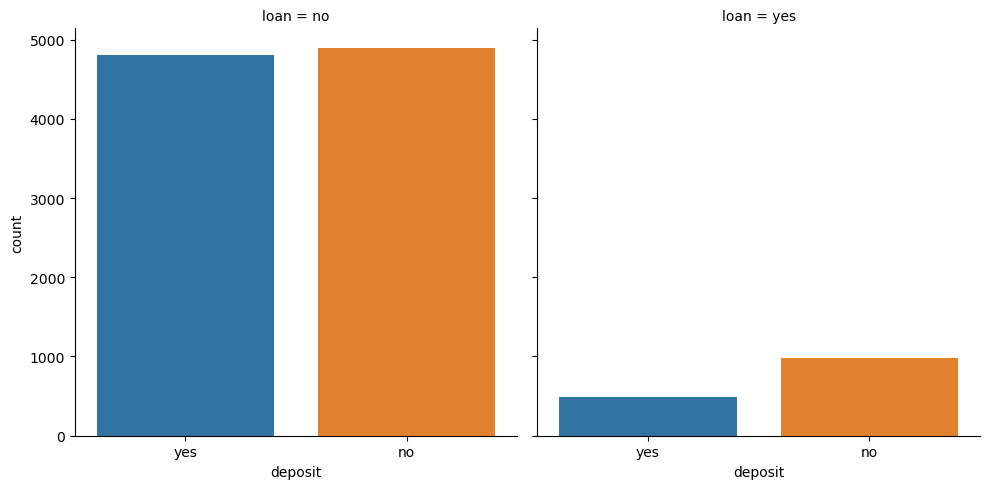

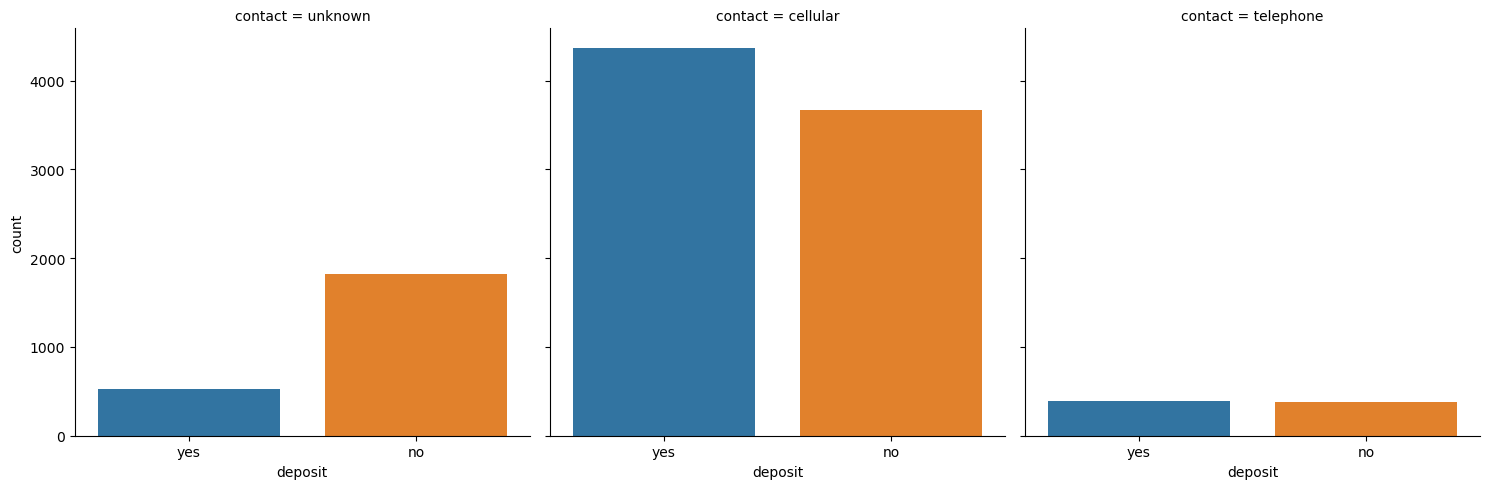

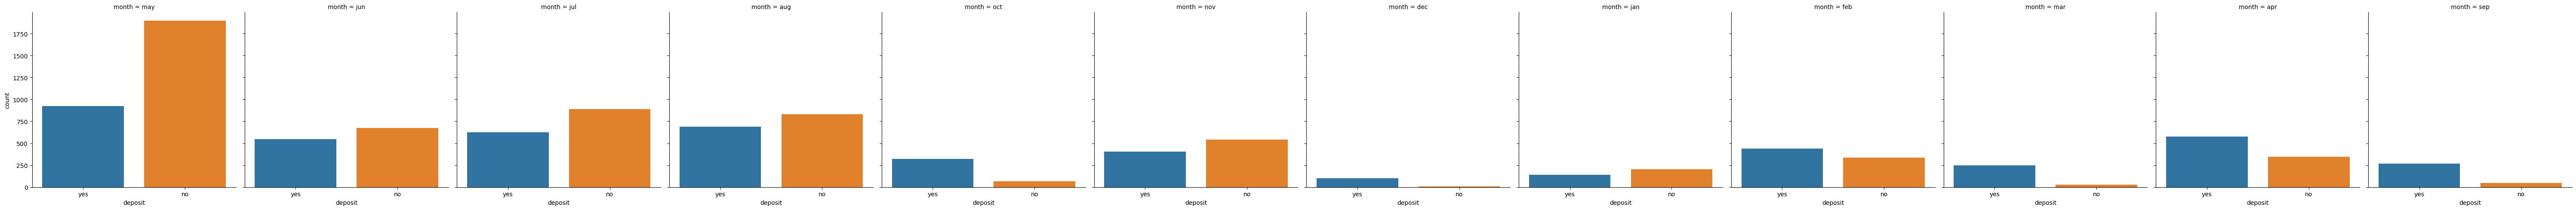

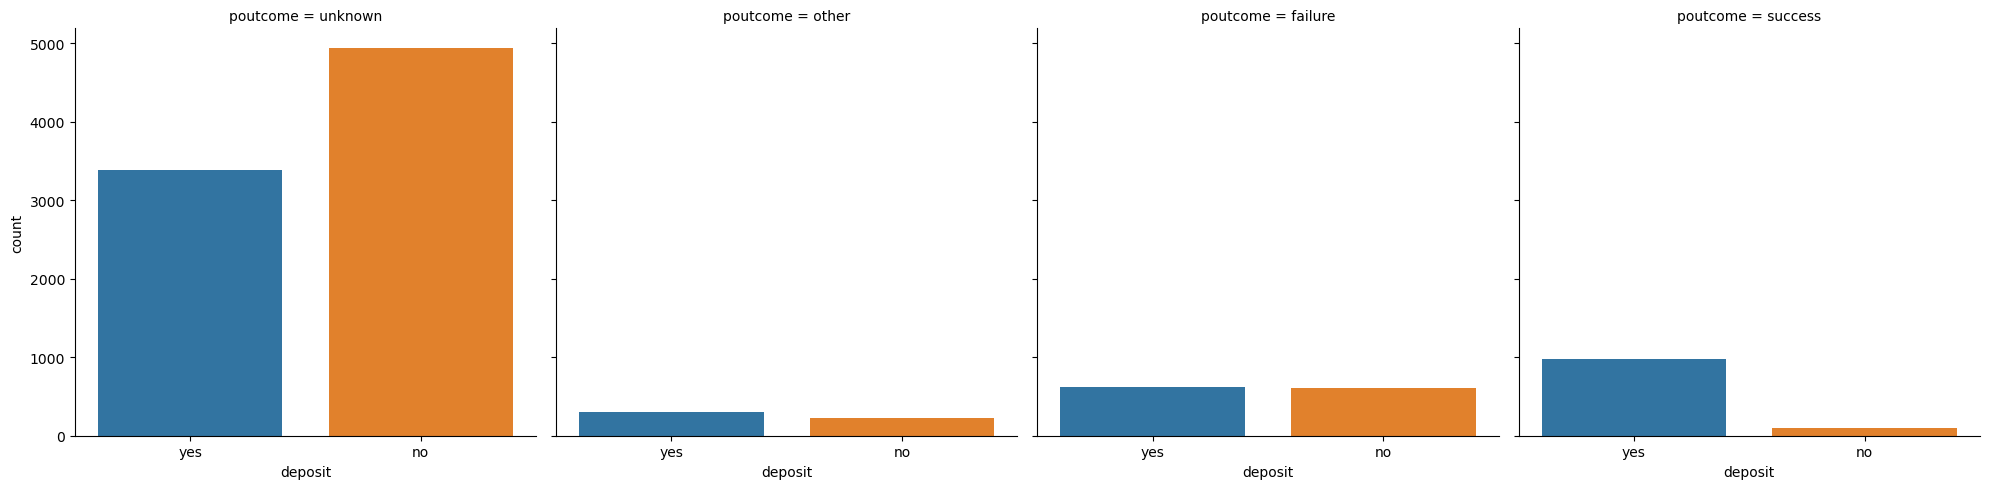

In [14]:
# checking thye relationship between categorical features and balel data
for categorical_feature in categorical_features:
    sns.catplot(x='deposit',col=categorical_feature,kind='count',data=bank_data)

In [15]:
# checking the count as numerical form
for categorical_feature in categorical_features:
    print(bank_data.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

In [16]:
numerical_features = [features for features in bank_data.columns if ((bank_data[features].dtype !='O') & (features not in ['deposit']))]
print("Numerical_features", len(numerical_features))

bank_data[numerical_features].head()

Numerical_features 7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


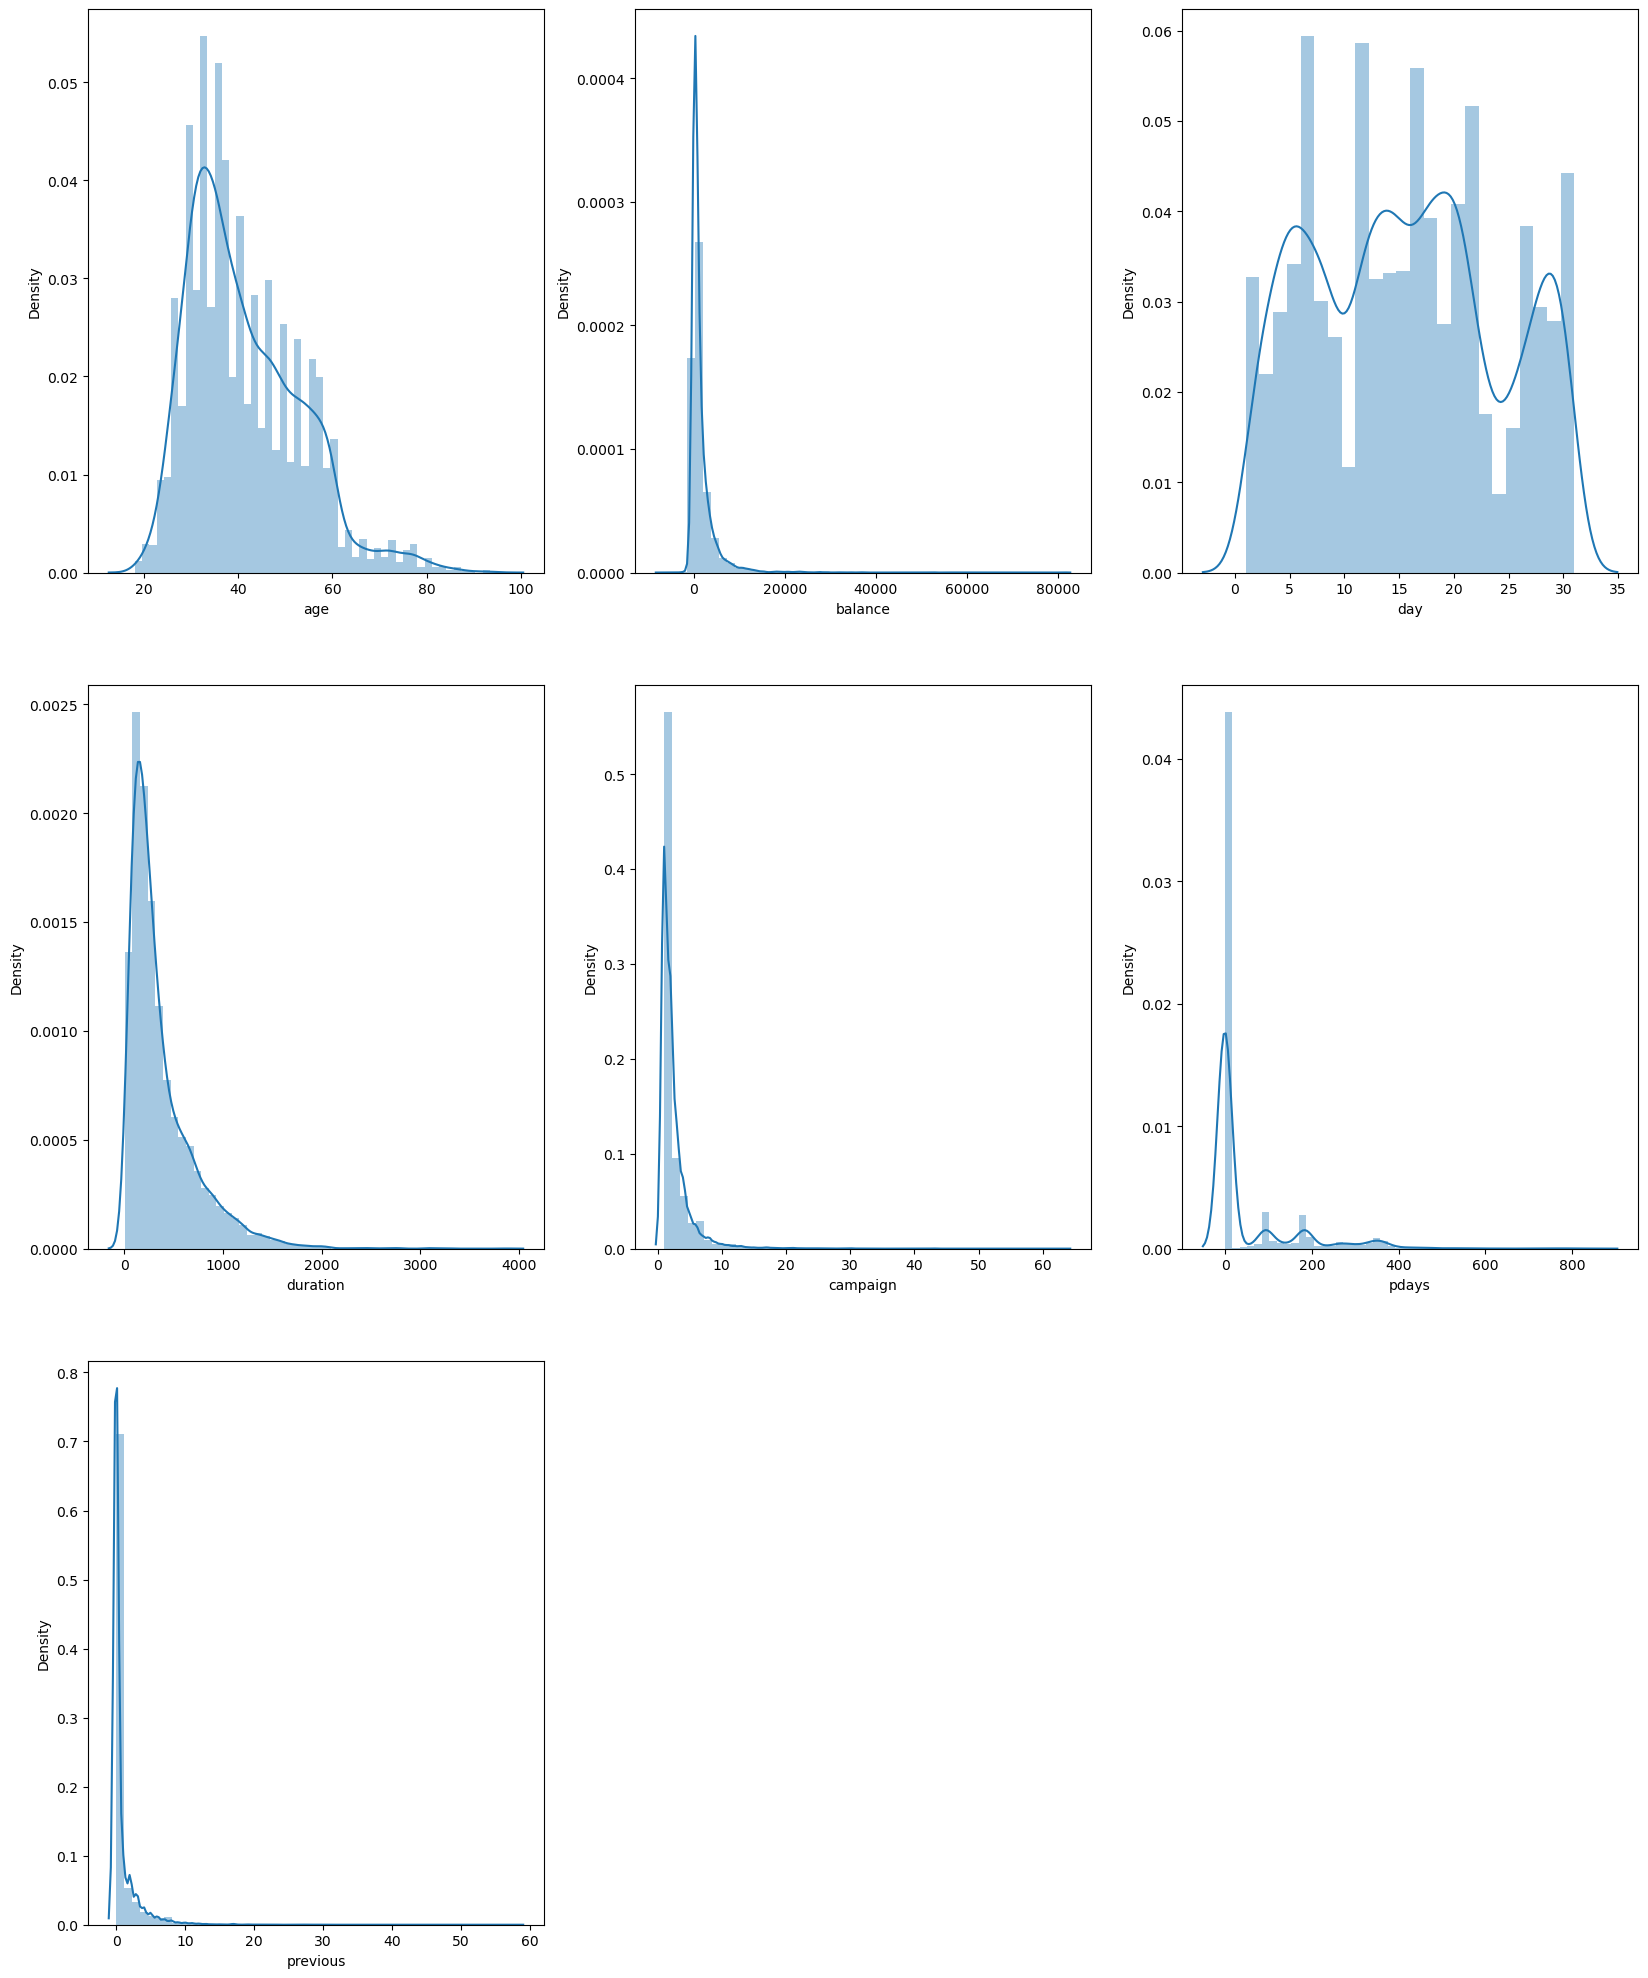

In [17]:
# checking the distribution of Numerical Features
plt.figure(figsize=(20,60),facecolor='white')
num=1
for numerical_feature in numerical_features:
    plt.subplot(7,3,num)
    sns.distplot(bank_data[numerical_feature])
    plt.xlabel(numerical_feature)
    num+=1
plt.show()

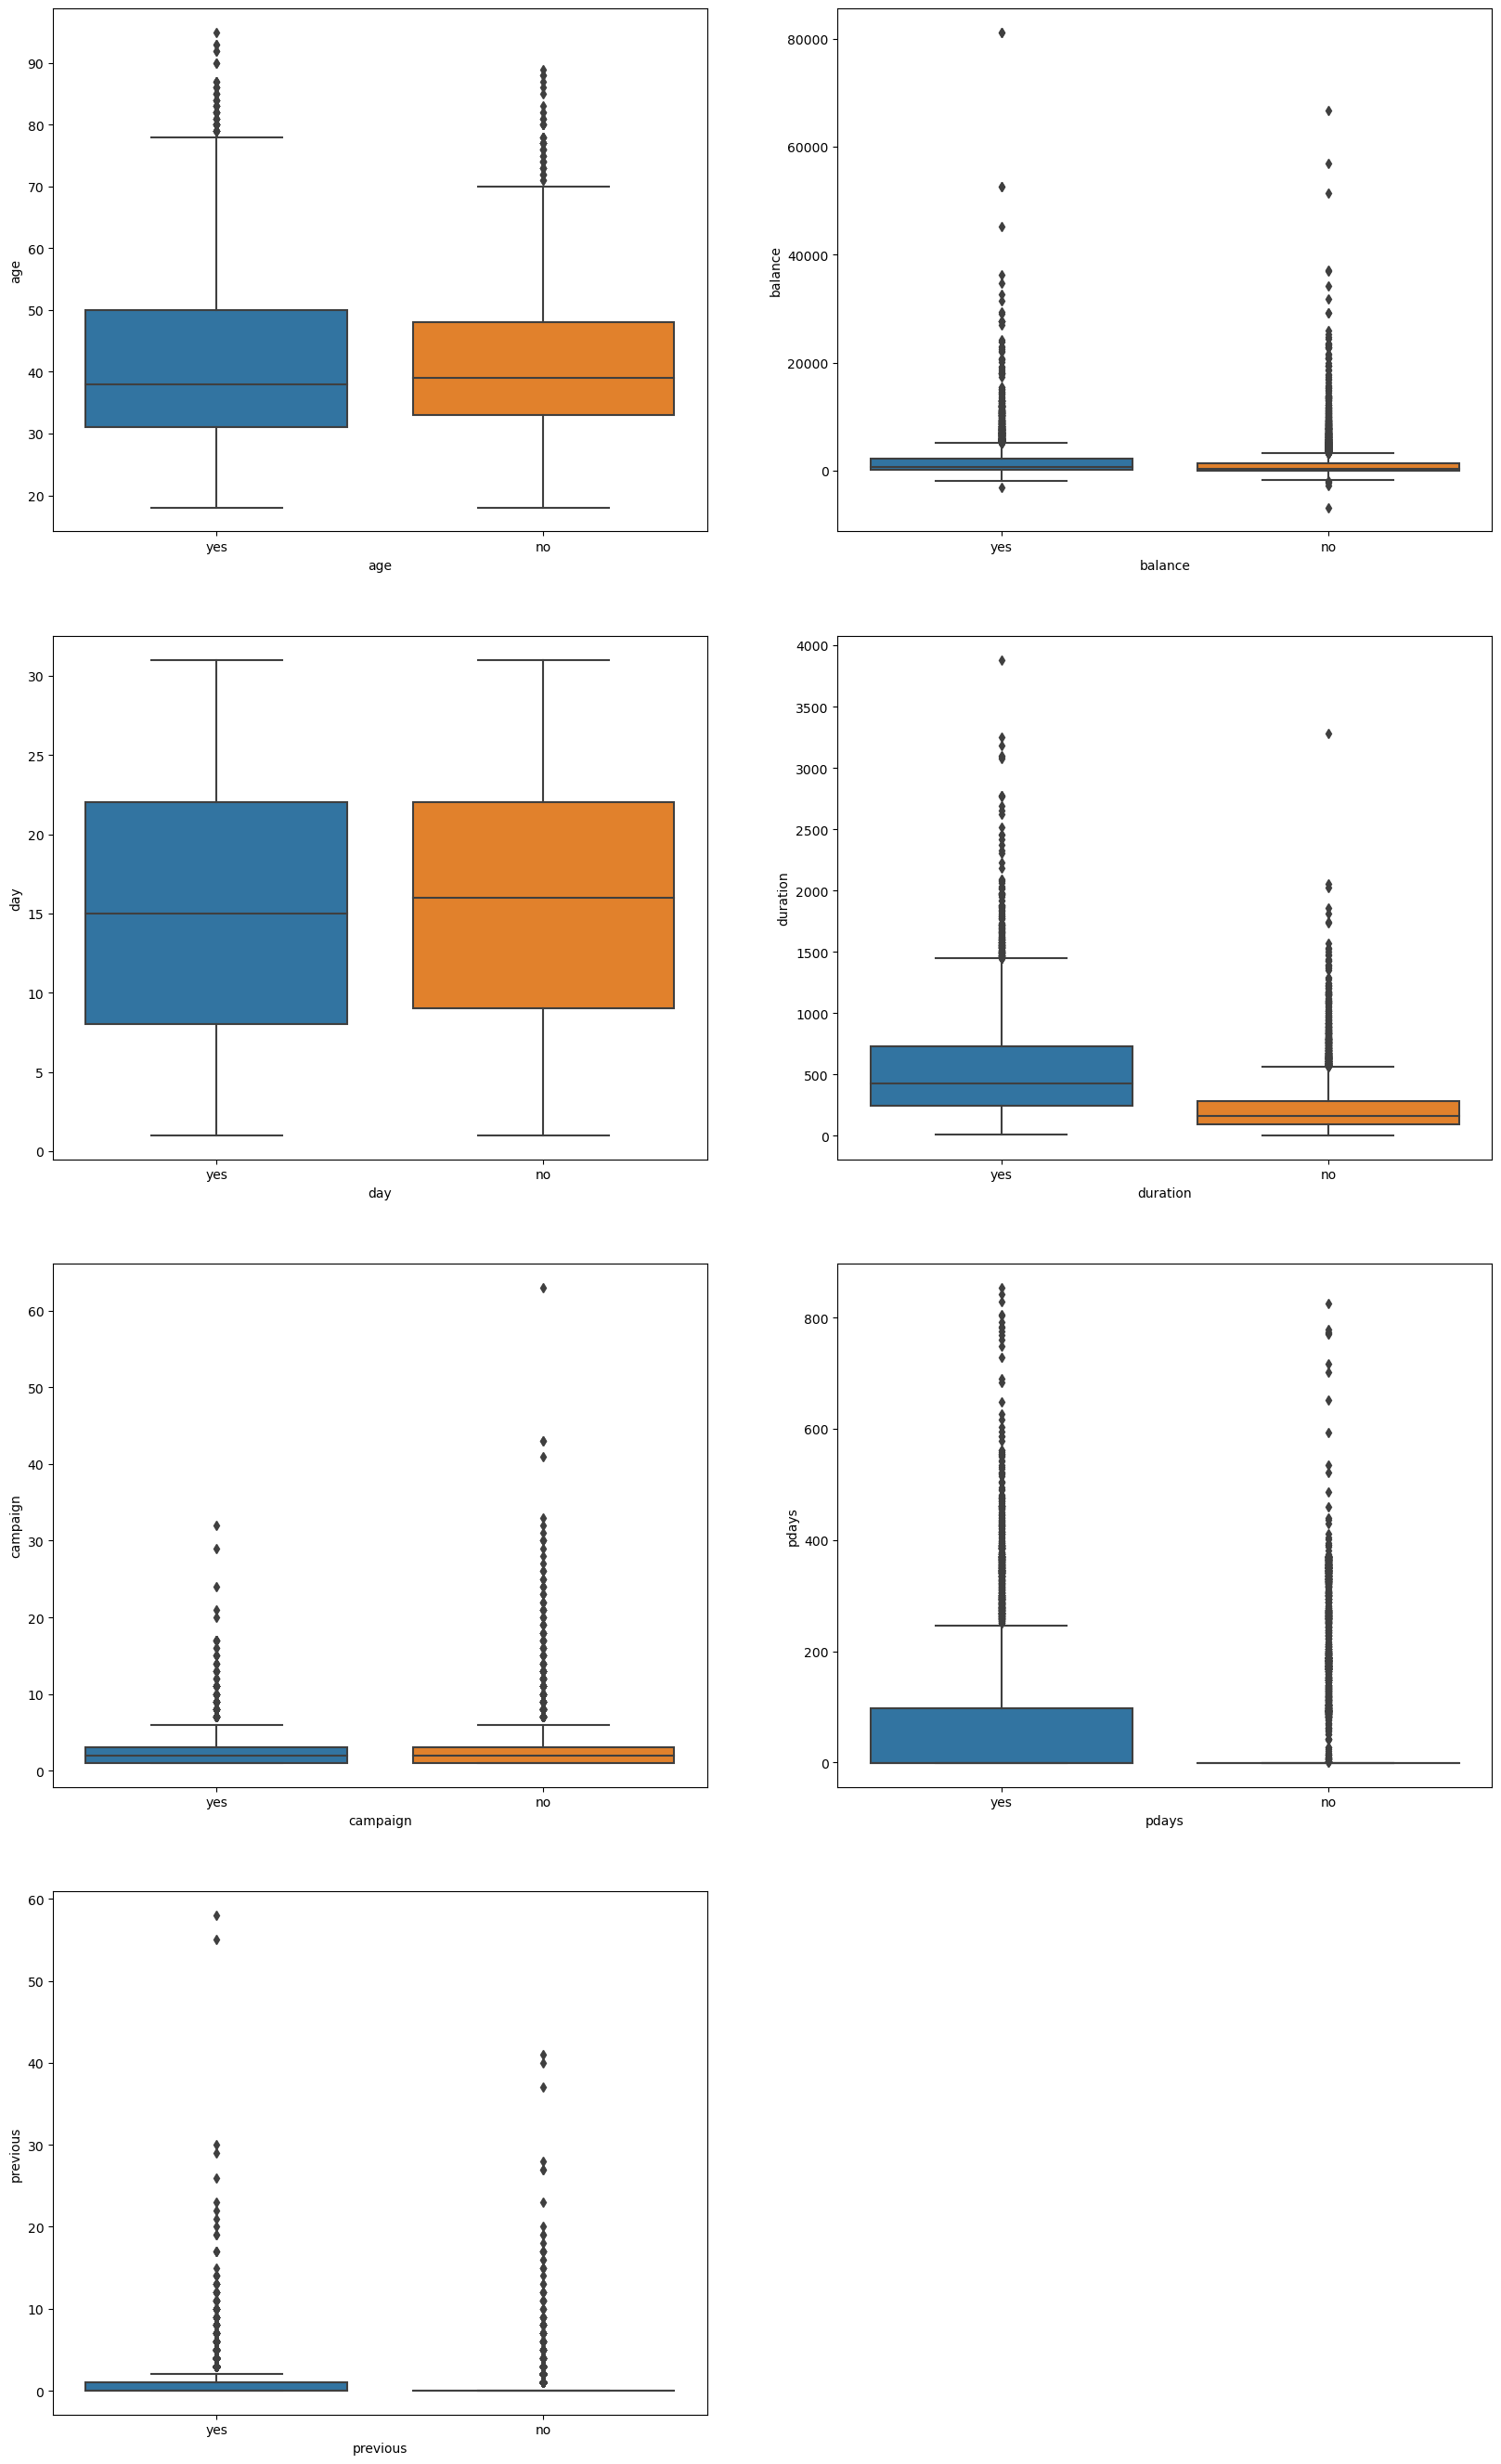

In [18]:
#Relation between Continous numerical Features and Labels
plt.figure(figsize=(20,60),facecolor='white')
num=1
for numerical_feature in numerical_features:
    plt.subplot(7,2,num)
    sns.boxplot(x="deposit",y=bank_data[numerical_feature],data=bank_data)
    plt.xlabel(numerical_feature)
    num+=1
plt.show()

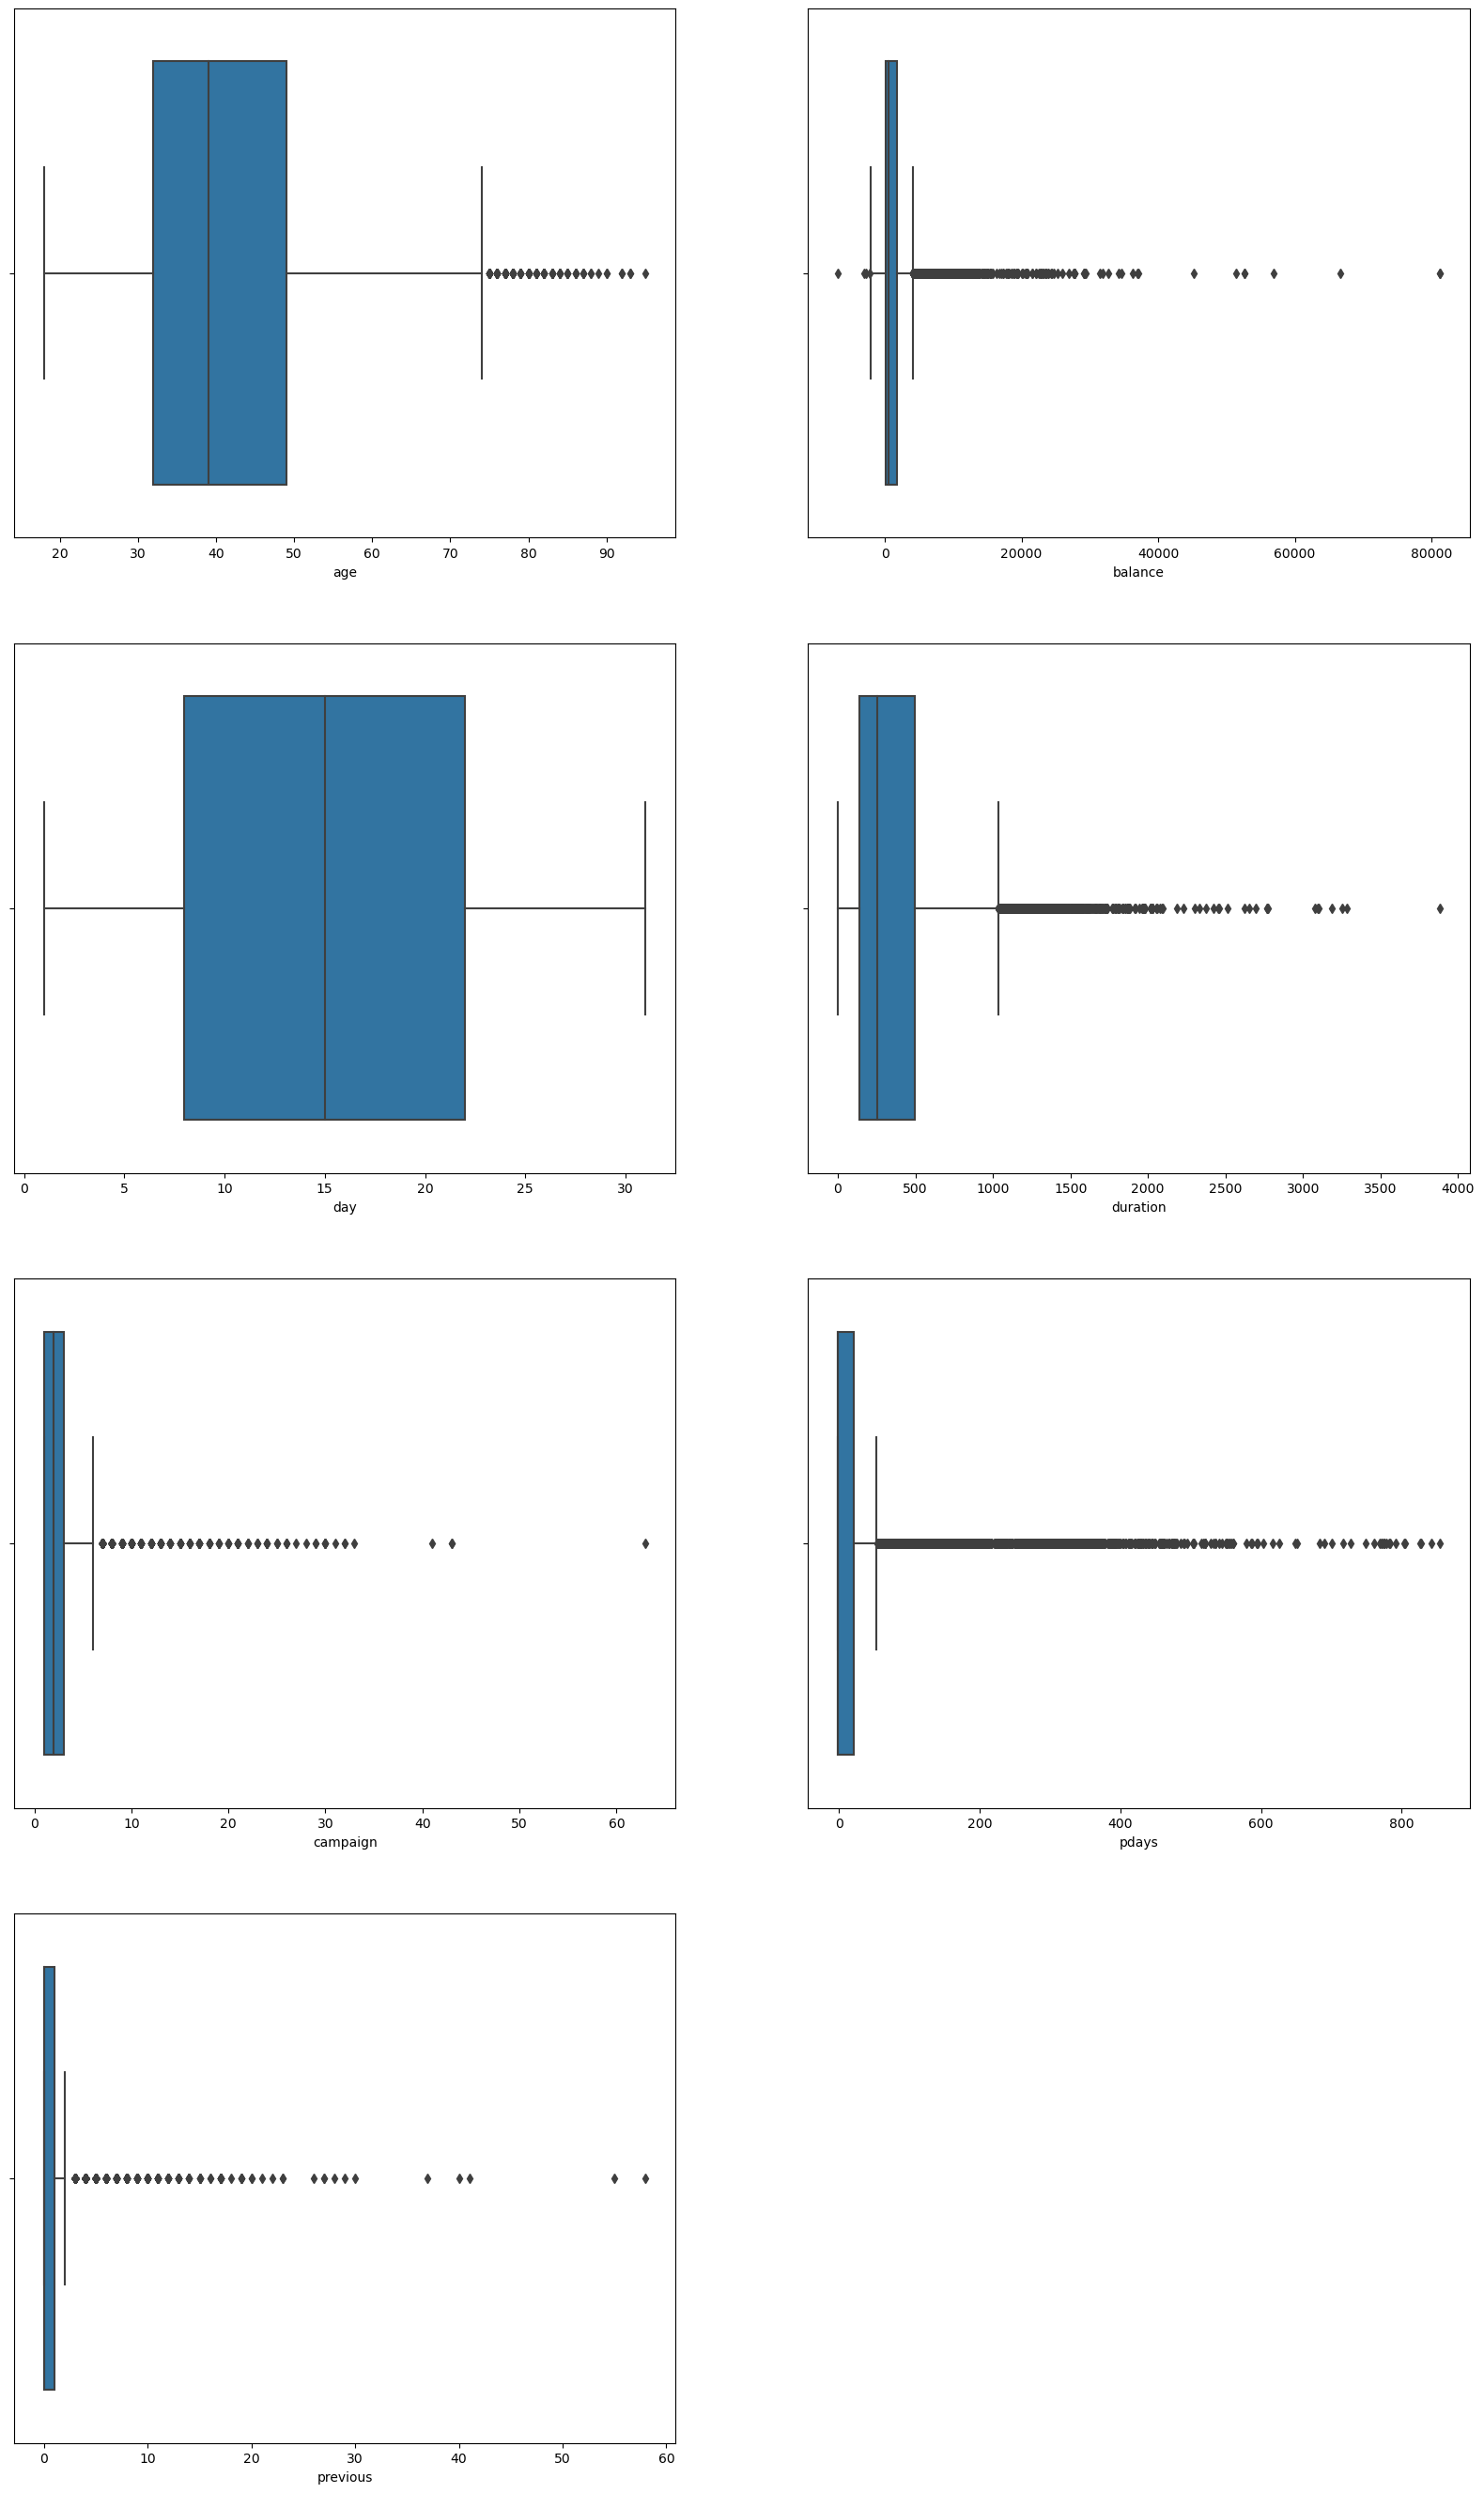

In [19]:
#Find Outliers in numerical features
plt.figure(figsize=(20,60),facecolor='white')
num=1
for numerical_feature in numerical_features:
    plt.subplot(7,2,num)
    sns.boxplot(bank_data[numerical_feature])
    plt.xlabel(numerical_feature)
    num+=1
plt.show()

<AxesSubplot:>

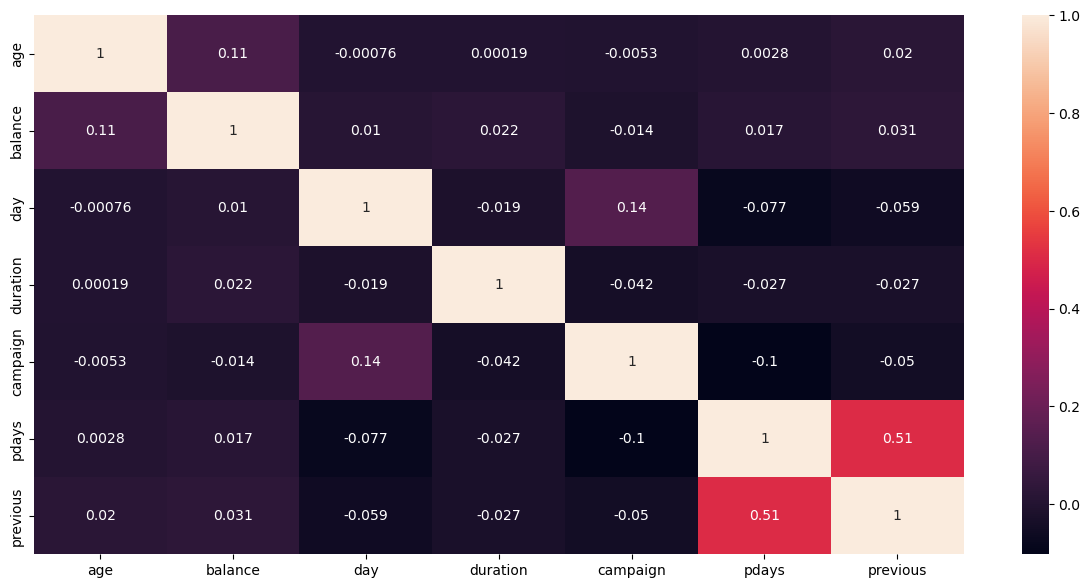

In [20]:
#Explore the Correlation between numerical features
corr_mat=bank_data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_mat,annot=True)

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

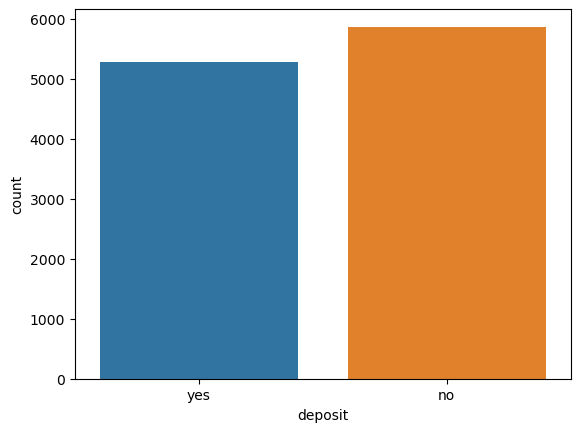

In [21]:
#chechking labeldata is balanced or not
sns.countplot(bank_data['deposit'])


bank_data['deposit'].groupby(bank_data['deposit']).count()

# Feature Engineering


In [22]:
bank_data_copy=bank_data.copy()

In [23]:
bank_data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
bank_data_copy.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [25]:
#removing the outliars using logtransformation
bank_data[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [26]:
#Using zscore for outliars removel
z_score = zscore(bank_data[['age','balance','campaign','duration','pdays','previous']])
abs_value = np.abs(z_score)
filtering_data = (abs_value <3).all(axis=1)
bank_data = bank_data[filtering_data]
bank_data.shape

(10098, 17)

In [27]:
#converting target variablles and bool value columns into numerical 
bool_col=['housing','loan','deposit']
for col in bool_col:
    bank_data[col]=bank_data[col].apply(lambda x: 1 if x=='yes' else 0)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,no,0,1,1,unknown,5,may,562,2,-1,0,unknown,1


In [28]:
bank_data = pd.get_dummies(bank_data,drop_first=True)

In [29]:
bank_data.head()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1,0,5,1042,1,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,1,0,5,1389,1,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,1,0,5,579,1,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,54,184,0,0,5,673,2,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
5,42,0,1,1,5,562,2,-1,0,1,...,0,0,0,1,0,0,0,0,0,1


# Model Building using pipeline and columns transformation :

In [30]:
# divided into target and features
X = bank_data.drop(columns='deposit',axis=1)
y = bank_data.deposit

In [31]:
print(X.shape)
print(y.shape)

(10098, 42)
(10098,)


### Feature Selection

In [35]:
from sklearn.ensemble import ExtraTreesRegressor #using 'ExtraTreesClassifier' for feature selection

In [36]:
model = ExtraTreesRegressor()

In [37]:
model.fit(X,y)
fearures_rank = pd.Series(model.feature_importances_,index=X.columns)
fearures_rank

age                    0.046064
balance                0.042672
housing                0.035980
loan                   0.012955
day                    0.072714
duration               0.311731
campaign               0.033369
pdays                  0.013790
previous               0.010102
job_blue-collar        0.010591
job_entrepreneur       0.004598
job_housemaid          0.003134
job_management         0.012620
job_retired            0.005722
job_self-employed      0.004468
job_services           0.007260
job_student            0.006997
job_technician         0.011428
job_unemployed         0.004936
job_unknown            0.001220
marital_married        0.012751
marital_single         0.011954
education_secondary    0.012830
education_tertiary     0.011698
education_unknown      0.005451
default_yes            0.001996
contact_telephone      0.007153
contact_unknown        0.043472
month_aug              0.018873
month_dec              0.001608
month_feb              0.012599
month_ja

###### Above each values shows how much each feature is importnat in order to predict the label data.

In [38]:
from sklearn.feature_selection import VarianceThreshold

In [48]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)
constant_filter.get_support().sum()

42

In [51]:
constant_list = [not temp for temp in constant_filter.get_support()] # inverse the constant features list
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [34]:
def split_data(X, y, test_size=0.25, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

In [44]:
def logistic_regression_model():
    model = LogisticRegression()
    return model

def decision_tree_model():
    model = DecisionTreeClassifier()
    return model

def randomforest_tree_model():
    model = RandomForestClassifier()
    return model

def support_vector_machine_tree_model():
    model = SVC()
    return model

def GradientBoostingClassifier_tree_model():
    model = GradientBoostingClassifier()
    return model

def XGBClassifier_tree_model():
    model = XGBClassifier()
    return model

In [45]:
def create_pipeline(model):
    pipeline = Pipeline(steps=[('scale', MinMaxScaler()),
        ('model', model)
    ])
    return pipeline

logistic_regression_pipeline = create_pipeline(logistic_regression_model())
decision_tree_pipeline = create_pipeline(decision_tree_model())
randomforest_tree_pipeline = create_pipeline(randomforest_tree_model())
svc_tree_pipeline = create_pipeline(support_vector_machine_tree_model())
gdb_pipeline = create_pipeline(GradientBoostingClassifier_tree_model())
xgb_tree_pipeline = create_pipeline(XGBClassifier_tree_model())

In [46]:
def train_and_evaluate(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    Classification_report = classification_report(y_test, y_pred)
    return accuracy, confusion , Classification_report

logistic_regression_accuracy, logistic_regression_confusion , logistic_classification_report = train_and_evaluate(logistic_regression_pipeline, X_train, y_train, X_test, y_test)
decision_tree_accuracy, decision_tree_confusion ,decision_tree_classification_report = train_and_evaluate(decision_tree_pipeline, X_train, y_train, X_test, y_test)
randomforest_accuracy, randomforest_confusion , randomforest_classification_report = train_and_evaluate(randomforest_tree_pipeline, X_train, y_train, X_test, y_test)
svc_accuracy, svc_confusion , svc_classification_report= train_and_evaluate(svc_tree_pipeline, X_train, y_train, X_test, y_test)
gdb_accuracy, gdb_confusion , gdb_classification_report= train_and_evaluate(gdb_pipeline, X_train, y_train, X_test, y_test)
xgb_accuracy, xgb_confusion , xgb_classification_report= train_and_evaluate(xgb_tree_pipeline, X_train, y_train, X_test, y_test)


print("Logistic Regression Accuracy: ", logistic_regression_accuracy)
print("Logistic Regression Confusion Matrix: ")
print(logistic_regression_confusion)
print("Logistic Regression classification report: ")
print(logistic_classification_report)

print("Decision Tree Accuracy: ", decision_tree_accuracy)
print("Decision Tree Confusion Matrix: ")
print(decision_tree_confusion)
print("Decision Tree classification report: ")
print(decision_tree_classification_report)


print("Random Forest Accuracy: ", randomforest_accuracy)
print("Random Forest Accuracy Confusion Matrix: ")
print(randomforest_confusion)
print("Random Forest Accuracy classification report: ")
print(randomforest_classification_report)

print("Support Vector machine: ", svc_accuracy)
print("Support Vector machine Confusion Matrix: ")
print(svc_confusion)
print("Support Vector machine classification report: ")
print(svc_classification_report)


print("Gredient boosting Accuracy: ", gdb_accuracy)
print("Gredient boosting Confusion Matrix: ")
print(gdb_confusion)
print("Gredient boosting classification report: ")
print(gdb_classification_report)

print("XGB Accuracy: ", xgb_accuracy)
print("XGB Accuracy Confusion Matrix: ")
print(xgb_confusion)
print("XGB Accuracy classification report: ")
print(xgb_classification_report)

Logistic Regression Accuracy:  0.8356435643564356
Logistic Regression Confusion Matrix: 
[[1208  165]
 [ 250  902]]
Logistic Regression classification report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1373
           1       0.85      0.78      0.81      1152

    accuracy                           0.84      2525
   macro avg       0.84      0.83      0.83      2525
weighted avg       0.84      0.84      0.83      2525

Decision Tree Accuracy:  0.7972277227722773
Decision Tree Confusion Matrix: 
[[1123  250]
 [ 262  890]]
Decision Tree classification report: 
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1373
           1       0.78      0.77      0.78      1152

    accuracy                           0.80      2525
   macro avg       0.80      0.80      0.80      2525
weighted avg       0.80      0.80      0.80      2525

Random Forest Accuracy:  0.8522772277227723


## Checking ROC & AUC Score 

###### for performance measurement..........!

In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [50]:
print(roc_auc_score(y_test,logistic_regression_pipeline.predict(X_test)))
print(roc_auc_score(y_test,decision_tree_pipeline.predict(X_test)))
print(roc_auc_score(y_test,randomforest_tree_pipeline.predict(X_test)))
print(roc_auc_score(y_test,svc_tree_pipeline.predict(X_test)))
print(roc_auc_score(y_test,gdb_pipeline.predict(X_test)))
print(roc_auc_score(y_test,xgb_tree_pipeline.predict(X_test)))

0.8314056557012219
0.7952432072914137
0.8524991528081249
0.8529777529942543
0.8463276128914785
0.8564202602775755


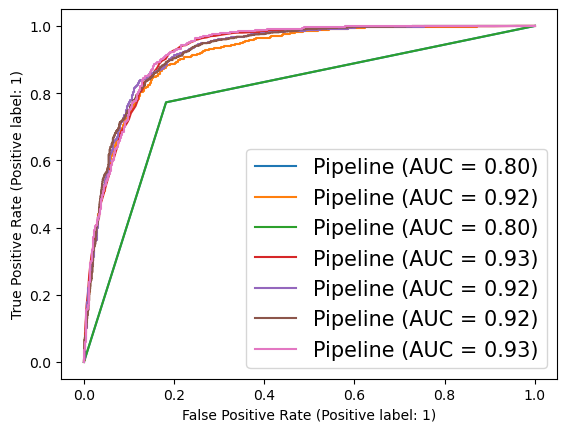

In [60]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(decision_tree_pipeline,X_test,y_test)
plot_roc_curve(logistic_regression_pipeline,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(decision_tree_pipeline,X_test,y_test,ax=disp.ax_)
plot_roc_curve(randomforest_tree_pipeline,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svc_tree_pipeline,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdb_pipeline,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb_tree_pipeline,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':15}, loc ='lower right')

###### As per the AOC AND ROC score our XGBOOST model is covering all area as compare the other models. further we will be checking cross validation score to see if our model is overfitted or underfitted 

In [61]:
from sklearn.model_selection import KFold,cross_val_score

In [62]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [70]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),XGBClassifier()]
def cross_validation (model,X,y,cv=5):
    results = {}
    for model in models:
        scores = cross_val_score(model, X, y, cv=cv)
        results[type(model).__name__] = {'mean_score': scores.mean(), 'std_score': scores.std()}
    return results

In [71]:
cross_validation(models,X,y)

{'LogisticRegression': {'mean_score': 0.7717382392028207,
  'std_score': 0.019576150691556694},
 'DecisionTreeClassifier': {'mean_score': 0.7546105071131184,
  'std_score': 0.02923536182584184},
 'RandomForestClassifier': {'mean_score': 0.8035348349099397,
  'std_score': 0.05142142148113235},
 'SVC': {'mean_score': 0.7316233406401562, 'std_score': 0.07512803920346621},
 'GradientBoostingClassifier': {'mean_score': 0.8103649978668,
  'std_score': 0.031159294854279464},
 'XGBClassifier': {'mean_score': 0.8141286491204841,
  'std_score': 0.039194666591840996}}

In cross validation also XGBOOST classifier giving good score hence this will be our final predictor. Further we will be checking good parameters using hyper parameter technique in oder to increase models accuracy.

In [72]:
from sklearn.model_selection import GridSearchCV

In [74]:
xgb_tree_pipeline.get_params().keys()  # to check the parameters

dict_keys(['memory', 'steps', 'verbose', 'scale', 'model', 'scale__clip', 'scale__copy', 'scale__feature_range', 'model__objective', 'model__use_label_encoder', 'model__base_score', 'model__booster', 'model__callbacks', 'model__colsample_bylevel', 'model__colsample_bynode', 'model__colsample_bytree', 'model__early_stopping_rounds', 'model__enable_categorical', 'model__eval_metric', 'model__feature_types', 'model__gamma', 'model__gpu_id', 'model__grow_policy', 'model__importance_type', 'model__interaction_constraints', 'model__learning_rate', 'model__max_bin', 'model__max_cat_threshold', 'model__max_cat_to_onehot', 'model__max_delta_step', 'model__max_depth', 'model__max_leaves', 'model__min_child_weight', 'model__missing', 'model__monotone_constraints', 'model__n_estimators', 'model__n_jobs', 'model__num_parallel_tree', 'model__predictor', 'model__random_state', 'model__reg_alpha', 'model__reg_lambda', 'model__sampling_method', 'model__scale_pos_weight', 'model__subsample', 'model__tre

In [108]:
parm_grid = params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.1, 1],
    'model__subsample': [0.5, 0.7, 1],
    'model__colsample_bytree': [0.5, 0.7, 1],
}
    


parm_grid

{'model__n_estimators': [100, 200, 300],
 'model__max_depth': [3, 4, 5],
 'model__learning_rate': [0.01, 0.1, 1],
 'model__subsample': [0.5, 0.7, 1],
 'model__colsample_bytree': [0.5, 0.7, 1]}

In [109]:
gridsearch = GridSearchCV(xgb_tree_pipeline, param_grid = parm_grid , cv=5)

In [110]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                      

In [111]:
gridsearch.best_params_

{'model__colsample_bytree': 0.7,
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 200,
 'model__subsample': 0.7}

In [112]:
gridsearch.score(X_test,y_test)

0.8594059405940594

We can see accuracy is bit increased using hyperparameter tuning.

### Model Saving

In [115]:
import pickle

In [117]:
filename = 'Bank_marketing.pickle'
pickle.dump(xgb_tree_pipeline,open(filename,'wb'))